# Understanding Descriptive Statistics

Import the necessary libraries here:

In [5]:
# Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [6]:
# your code here
def dice_throw(n):
    throws = random.choices([1,2,3,4,5,6], k=n)
    return pd.DataFrame(throws)

dice_throw(1000).mean()

0    3.432
dtype: float64

In [7]:
df = (dice_throw(50))
df.columns=list('R')
df

,R
0,5
1,1
2,3
3,3
4,2
5,2
6,5
7,5
8,3
9,5


#### 2.- Plot the results sorted by value.

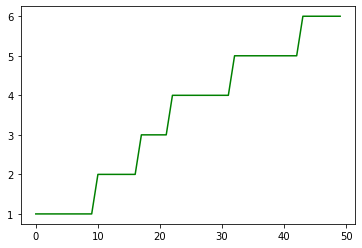

In [9]:
# your code here
df = dice_throw(50).sort_values(by=0).reset_index()[0]
plt.plot(range(len(df)), df, color = 'green')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([10.,  7.,  5., 10., 11.,  7.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

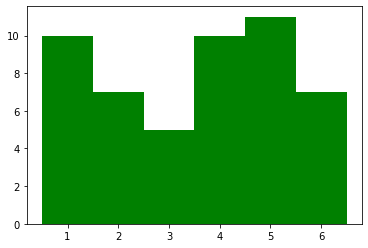

In [10]:
# your code here
plt.hist(df, bins= 6, range=(0.5, 6.5), color= 'green')

In [11]:
print('Histogram plot is showing the number of times each dice number ocurred.')

Histogram plot is showing the number of times each dice number ocurred.


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# your code here
def mean_calculation(x):
    return sum(x) / len(x)

In [13]:
mean_df = mean_calculation(df)
mean_df

3.52

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [14]:
# your code here
# First, calculate the frequency distribution
def freq_calc(x):
    dic = {}
    for n in x:
        if n not in dic:
            dic[n] = 0
        else:
            dic[n] += 1
    return dic

In [15]:
print(freq_calc(df))

{1: 9, 2: 6, 3: 4, 4: 9, 5: 10, 6: 6}


In [16]:
# Then, calculate the mean using the values of the frequency distribution you've just computed.
list1 = {1: 5, 2: 7, 3: 11, 4: 7, 5: 6, 6: 8}
list1_mu = sum(list1)/len(list1)
list1_mu

# Not entirely sure if it's this what the exercise requests?

3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [17]:
# your code here
def calc_median(x):
    n = len(x)
    index = n // 2
    if n % 2:
        return sorted(x)[index]
    return sum(sorted(x)[index - 1:index + 1]) / 2     

In [18]:
median_df = calc_median(df)
median_df

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [19]:
# your code here
def quartile_calc(x):
    middle = calc_median(x)
    Q1 = calc_median(middle)[0]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [20]:
# your code here
roll_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_hundred = roll_hundred.sort_values('value')
roll_hundred.head()

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1


Text(0.5, 0, 'Dice value for each throw')

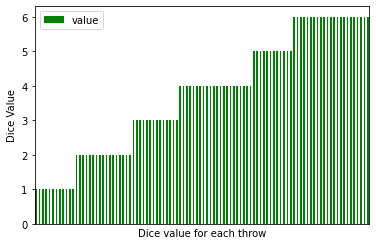

In [21]:
roll_hundred[['value']].plot(kind='bar', color = 'green')
plt.xticks([])
plt.ylabel('Dice Value')
plt.xlabel('Dice value for each throw')

In [22]:
print(f"Conclusions? Values between 1 and 6 rolled 100x. It shows how many times the values between 1 and 6 were rolled but it's not very perceptive since we couldn't see the numbers so I decided to exclude them from the axis.")


Conclusions? Values between 1 and 6 rolled 100x. It shows how many times the values between 1 and 6 were rolled but it's not very perceptive since we couldn't see the numbers so I decided to exclude them from the axis.


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [23]:
# your code here
mean_calculation(roll_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [24]:
# your code here
freq_calc(list(roll_hundred['value']))

{1: 11, 2: 16, 3: 13, 4: 21, 5: 11, 6: 22}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

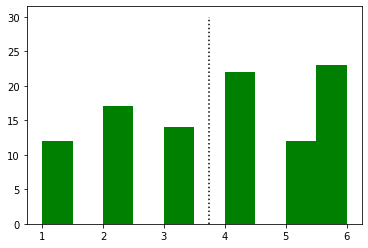

In [26]:
# your code here
plt.hist(roll_hundred['value'], color ='green')
plt.vlines(roll_hundred['value'].mean(), ymin = 0, ymax = 30, linestyles ="dotted", colors ="k") 

# It was actually quite nice to learn the dot line

In [27]:
print("The median amount is 3.74, exactly where the line is showed in the plot")

The median amount is 3.74, exactly where the line is showed in the plot


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [29]:
# your code here
roll_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_thousand = roll_thousand.sort_values('value')
roll_thousand

,Unnamed: 0,roll,value
564,564,564,1
922,922,922,1
560,560,560,1
213,213,213,1
214,214,214,1
...,...,...,...
855,855,855,6
360,360,360,6
857,857,857,6
388,388,388,6


(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

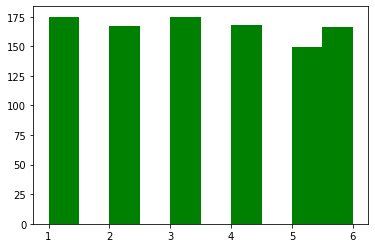

In [30]:
plt.hist(roll_thousand['value'], color = 'green')

In [31]:
print("With this plot we can see that the distribution is more uniform. Basically since we have more samples the distribution changed and tends to be more similar. It makes perfectly sense.")

With this plot we can see that the distribution is more uniform. Basically since we have more samples the distribution changed and tends to be more similar. It makes perfectly sense.


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [32]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population = ages_population.sort_values('observation')
ages_population

,observation
489,1.0
209,1.0
301,2.0
451,2.0
338,4.0
...,...
523,69.0
437,70.0
493,71.0
339,73.0


(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <a list of 10 Patch objects>)

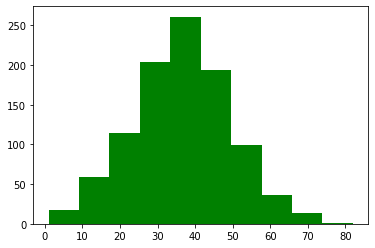

In [33]:
plt.hist(ages_population['observation'], color = 'green')

In [34]:
ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [35]:
print(f'The mean is 36.5 and the standard deviation is 12.8.')

The mean is 36.5 and the standard deviation is 12.8.


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [239]:
# your code here
print(ages_population.mean())
print(ages_population.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [198]:
"""
Nothing to add. Already did it previously.
"""

'\nNothing to add. Already did it previously.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [36]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2 = ages_population2.sort_values('observation')
ages_population2

,observation
327,19.0
998,19.0
96,19.0
897,20.0
272,20.0
...,...
616,35.0
186,35.0
263,35.0
288,36.0


(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

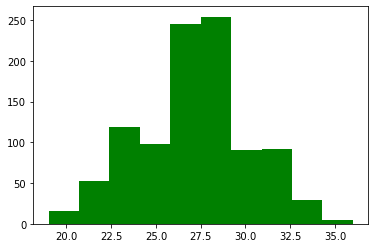

In [37]:
plt.hist(ages_population2['observation'], color = 'green')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [42]:
print(f'It seems that we have a narrower range of ages. The mean value should be around 27 and the standard deviation around 2.')

It seems that we have a narrower range of ages. The mean value should be around 27 and the standard deviation around 2.


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [44]:
# your code here
print(ages_population2.mean())
print(ages_population2.std())

# There you go

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [45]:
"""
Nothing to add.
"""

'\nNothing to add.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [46]:
# your code here
ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3 = ages_population3.sort_values('observation')
ages_population3

,observation
263,1.0
924,2.0
415,2.0
639,4.0
698,4.0
...,...
76,75.0
323,75.0
12,76.0
937,77.0


(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

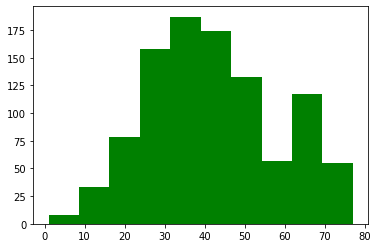

In [48]:
plt.hist(ages_population3['observation'], color = 'green')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [49]:
# your code here
print(ages_population3.mean())
print(ages_population3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [50]:
print(f'We can see that the distribution now has two big centers. One around age 35 and the other around age 60.')

We can see that the distribution now has two big centers. One around age 35 and the other around age 60.


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [51]:
# your code here
print(ages_population3.observation.quantile(.25))
print(ages_population3.observation.quantile(.5))
print(ages_population3.observation.quantile(.75))

30.0
40.0
53.0


In [52]:
"""
Nothing to add.
"""

'\nNothing to add.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [53]:
# your code here
import statistics

# calculate a new percentile
print(ages_population3['observation'].quantile(0.85))

# calculate the mode
statistics.mode(ages_population3['observation'])

64.0


32.0

In [54]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [127]:
# your code here

In [128]:
"""
your comments here
"""

'\nyour comments here\n'